In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Netflix_stock_data.csv')

In [11]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


In [12]:
df.describe()

,Close,High,Low,Open,Volume
count,5810.000000,5810.000000,5810.000000,5810.000000,5.810000e+03
mean,174.277189,176.778673,171.606167,174.184463,1.513608e+07
std,238.038218,241.092964,234.690133,237.807511,1.836569e+07
min,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,4.307500,4.406428,4.226071,4.310714,5.385225e+06
50%,47.330715,48.094999,46.490715,47.347857,9.366850e+06
75%,319.687500,324.845009,313.472504,319.279991,1.803375e+07
max,1279.109985,1298.000000,1273.810059,1286.839966,3.234140e+08


In [13]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [14]:
#convert date into datetime
df['Date']= pd.to_datetime(df['Date'])

In [15]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
3,2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
4,2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


In [16]:
df=df.sort_values('Date')

In [18]:
df.set_index('Date' , inplace=True)

In [22]:
 df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400
2002-05-29,1.103571,1.164286,1.085714,1.164286,6757800
2002-05-30,1.071429,1.107857,1.071429,1.107857,10154200


In [47]:
df=df.dropna()

In [23]:
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()


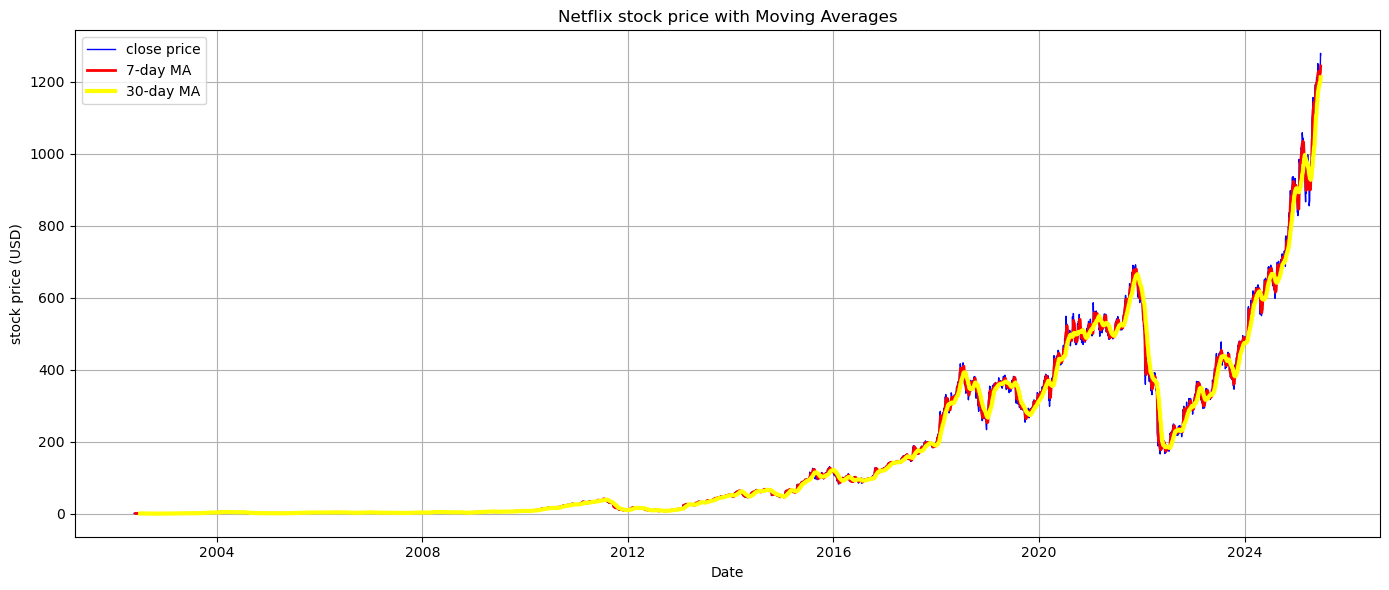

In [38]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'] , label='close price' , color = 'blue' , linewidth=1)
plt.plot(df['7_day_MA'], label='7-day MA' , color = 'red' , linewidth=2)
plt.plot(df['30_day_MA'] , label= '30-day MA' , color= 'yellow' ,linewidth=3) 
plt.title('Netflix stock price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('stock price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [45]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("Netflix Stock Price Trend Dashboard")

df = pd.read_csv('Netflix_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

st.line_chart(df['Close'])



DeltaGenerator()

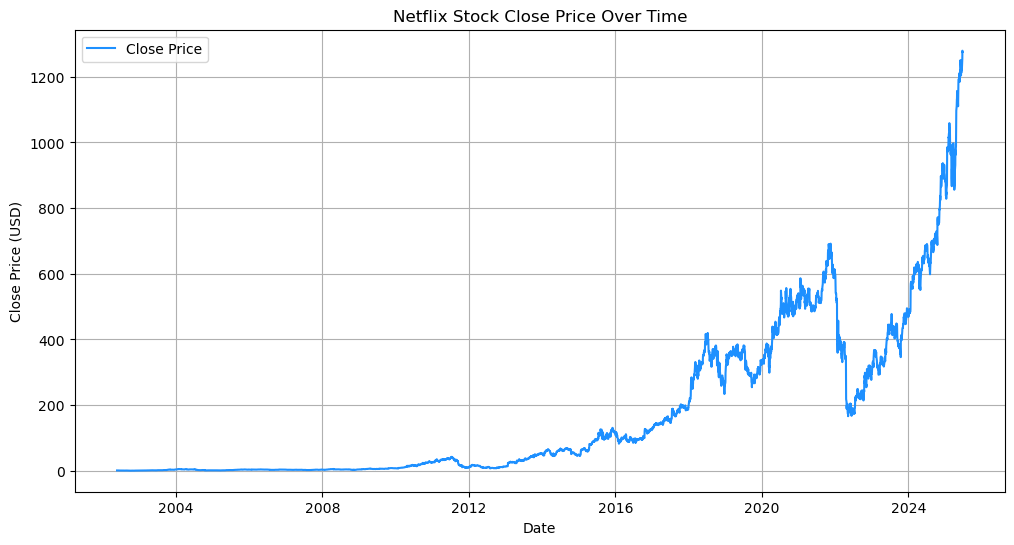

In [48]:


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='dodgerblue')
plt.title("Netflix Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


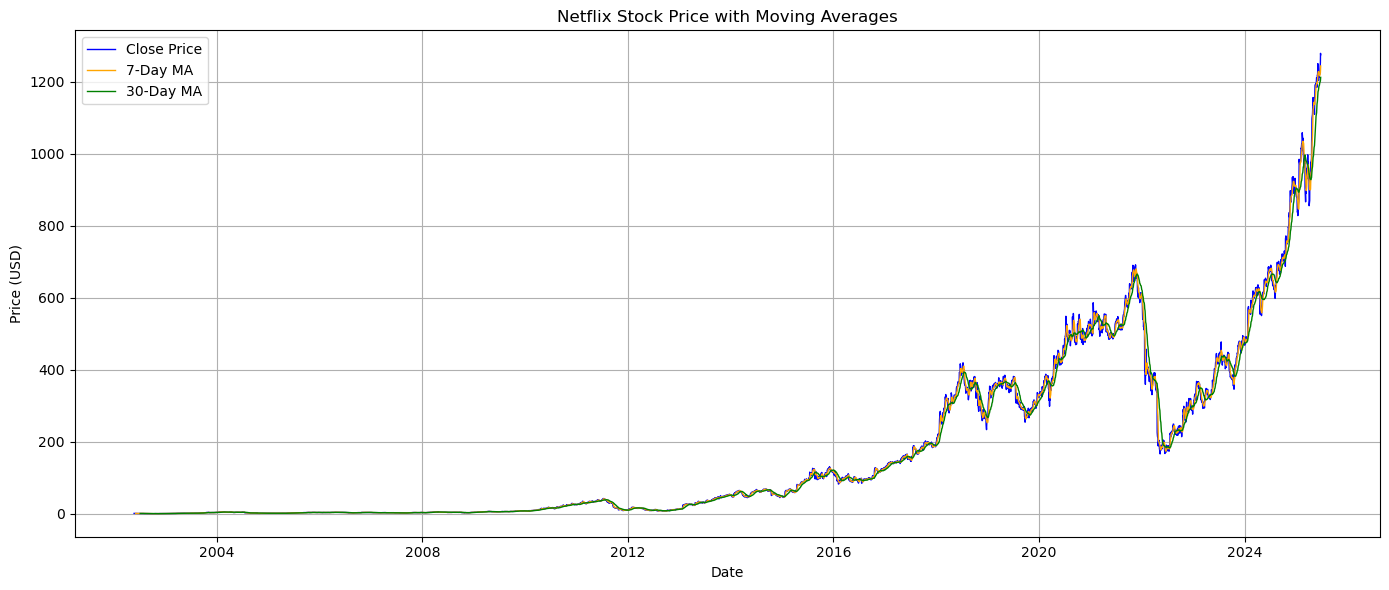

In [52]:
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(df['7_day_MA'], label='7-Day MA', color='orange', linewidth=1)
plt.plot(df['30_day_MA'], label='30-Day MA', color='green', linewidth=1)
plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


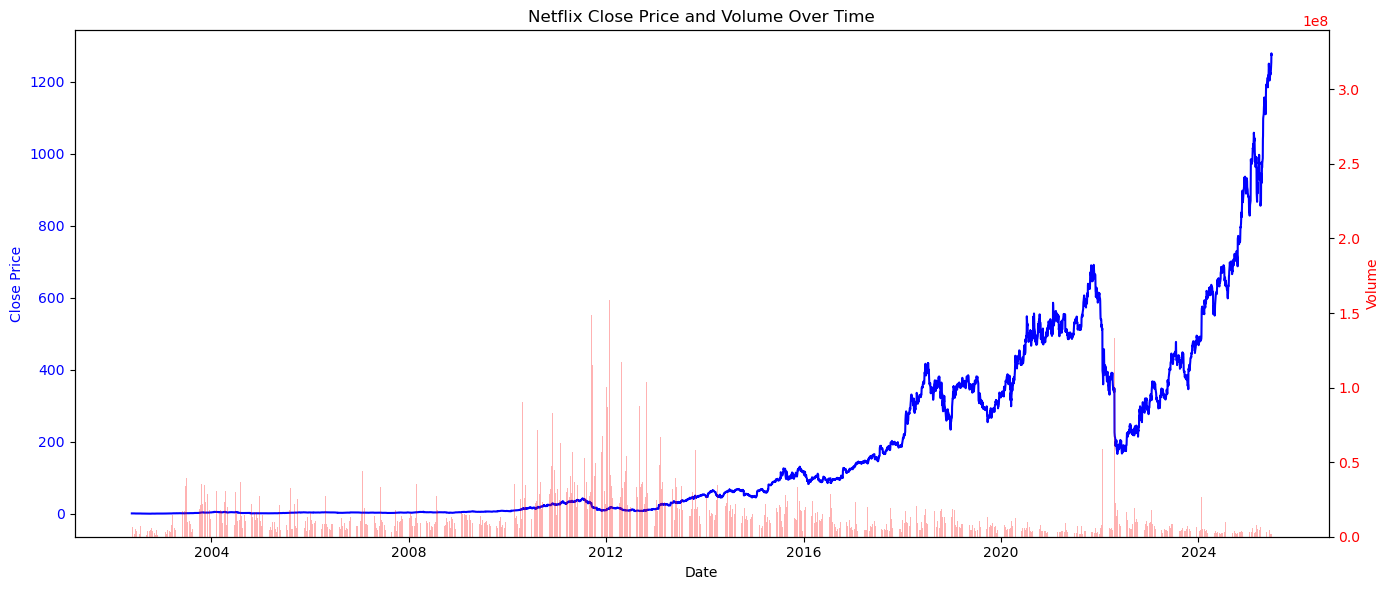

In [51]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df.index, df['Close'], color='blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='red')
ax2.bar(df.index, df['Volume'], color='red', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Netflix Close Price and Volume Over Time")
fig.tight_layout()
plt.show()


/var/folders/1s/0vyh51h52r3811bpx_0zqbgm0000gn/T/ipykernel_1304/1008486241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='viridis')


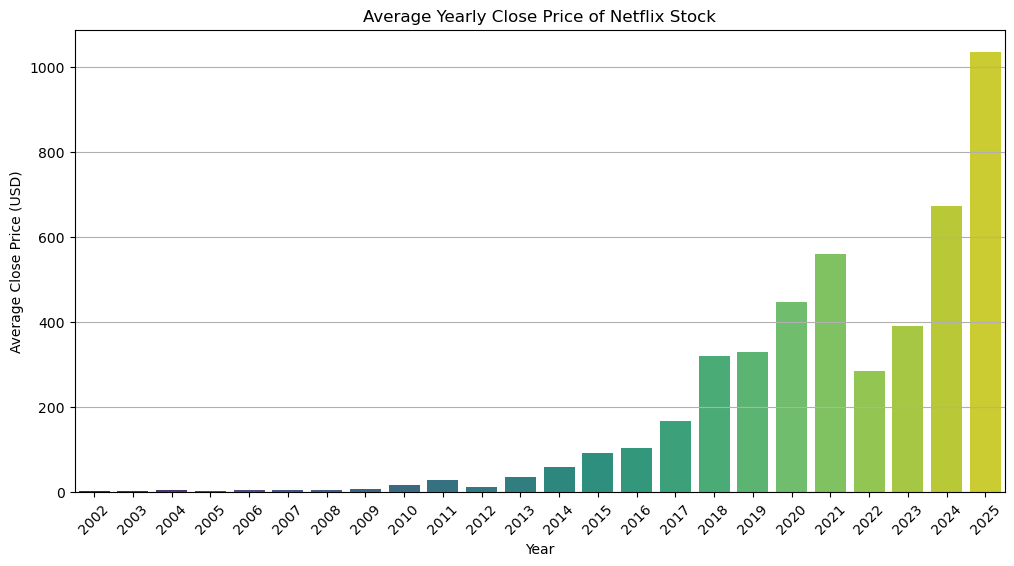

In [53]:
df['Year'] = df.index.year
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='viridis')
plt.title("Average Yearly Close Price of Netflix Stock")
plt.xlabel("Year")
plt.ylabel("Average Close Price (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


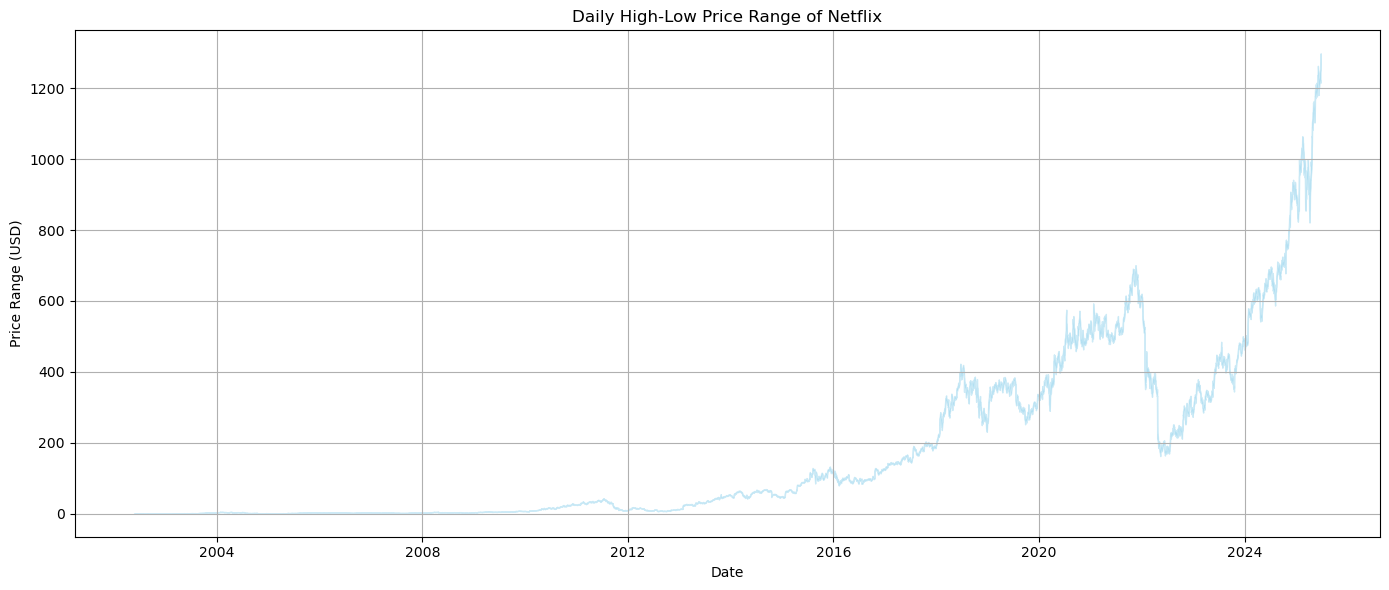

In [54]:
plt.figure(figsize=(14, 6))
plt.fill_between(df.index, df['Low'], df['High'], color='skyblue', alpha=0.4)
plt.title("Daily High-Low Price Range of Netflix")
plt.xlabel("Date")
plt.ylabel("Price Range (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [55]:
df.to_csv("cleaned_netflix_stock.csv")
